In [1]:
import numpy as np
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import matplotlib.pyplot as plt

#### Load MNIST dataset

In [2]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [3]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

#### Visualize Dataset

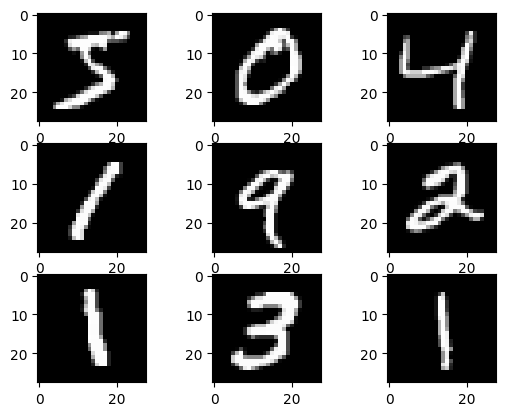

In [4]:
for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
plt.show()

#### Reshaping

In [3]:
X_train_r = X_train.reshape(X_train.shape[0], X_train.shape[2], X_train.shape[2], 1)
X_test_r = X_test.reshape(X_test.shape[0], X_test.shape[2], X_test.shape[2], 1)

#### Normalization

In [4]:
X_train_r = tf.keras.utils.normalize(X_train_r, axis = 1)
X_test_r = tf.keras.utils.normalize(X_test_r, axis = 1)

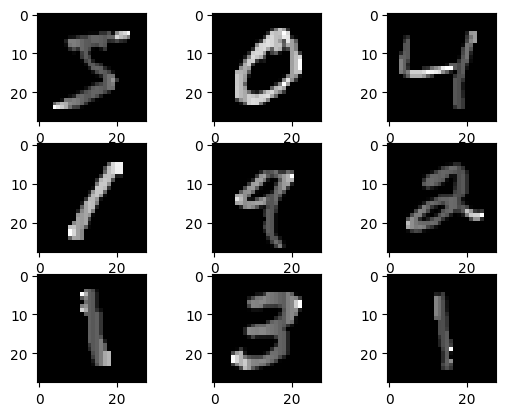

In [7]:
for i in range(9):
  plt.subplot(330 + 1 + i)
  plt.imshow(np.squeeze(X_train_r[i]), cmap=plt.get_cmap('gray'))
plt.show()

In [5]:
image_shape = X_train_r.shape[1:]
print(image_shape)

(28, 28, 1)


#### CNN MODEL

In [6]:
model = model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(48, (3,3), activation = tf.nn.relu, input_shape = image_shape))
model.add(tf.keras.layers.MaxPool2D((2,2)))
model.add(tf.keras.layers.Conv2D(64, (3,3), activation = tf.nn.relu))


In [7]:
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation = tf.nn.softmax))

In [8]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model.fit(X_train_r, Y_train, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 46s 24ms/step - loss: 0.1449 - accuracy: 0.9558
Epoch 2/10
1875/1875 [==============================] - 44s 23ms/step - loss: 0.0536 - accuracy: 0.9830
Epoch 3/10
1875/1875 [==============================] - 45s 24ms/step - loss: 0.0394 - accuracy: 0.9877
Epoch 4/10
1875/1875 [==============================] - 67s 36ms/step - loss: 0.0202 - accuracy: 0.9931
Epoch 7/10
1875/1875 [==============================] - 51s 27ms/step - loss: 0.0160 - accuracy: 0.9948
Epoch 8/10
1875/1875 [==============================] - 63s 33ms/step - loss: 0.0143 - accuracy: 0.9954
Epoch 9/10
1875/1875 [==============================] - 56s 30ms/step - loss: 0.0126 - accuracy: 0.9963
Epoch 10/10
1875/1875 [==============================] - 56s 30ms/step - loss: 0.0121 - accuracy: 0.9962


#### Summary of Model

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 48)        480       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 48)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        27712     
                                                                 
 dropout (Dropout)           (None, 11, 11, 64)        0         
                                                                 
 flatten (Flatten)           (None, 7744)              0         
                                                                 
 dense (Dense)               (None, 256)               1982720   
                                                        

#### Plotting CNN MODEL

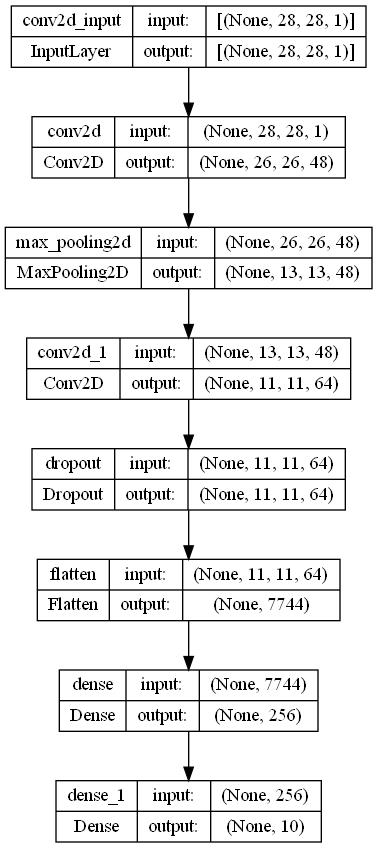

In [10]:
from tensorflow.keras.utils import plot_model
plot_model(model, 'model.jpg', show_shapes = True)

#### LOSS AND ACCURACY

In [11]:
val_loss, val_accuracy = model.evaluate(X_test, Y_test)
print("Validation loss : ", val_loss*100, "%")
print("Validation accuracy : ", val_accuracy*100,"%")

313/313 [==============================] - 2s 6ms/step - loss: 22.4528 - accuracy: 0.9849
Validation loss :  2245.278739929199 %
Validation accuracy :  98.48999977111816 %


#### Saving Model

In [8]:
model.save('/content/drive/MyDrive/Machine Learning Projects/Mnist.model')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Machine Learning Projects/Mnist.model\assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Machine Learning Projects/Mnist.model\assets


In [9]:
new_model = tf.keras.models.load_model("/content/drive/MyDrive/Machine Learning Projects/Mnist.model")

#### Predicting Testcase

In [10]:
predictions = new_model.predict(X_test)

313/313 [==============================] - 2s 5ms/step


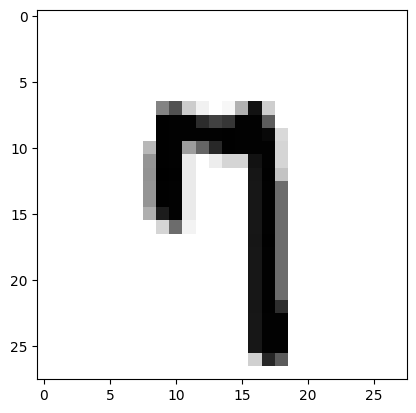

In [3]:
plt.imshow(X_test[80], cmap = plt.get_cmap('binary'))

In [14]:
print("The prediction is : ", np.argmax(predictions[80]))

The prediction is :  7
